<a href="https://colab.research.google.com/github/EvenSol/NeqSim-Colab/blob/master/notebooks/fluidflow/singlephaseflow.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [1]:
#@title Calculation of single phase flow in pipelines
#@markdown This notebook gives an interactive introduction to calculation of single phase flow in pipelines.
%%capture
!pip install neqsim
import neqsim
from neqsim.thermo.thermoTools import *
from neqsim.process.processTools import *
import matplotlib
import numpy as np
import matplotlib.pyplot as plt
import math
%matplotlib inline

from neqsim import methods
from neqsim.thermo import fluid, TPflash
from neqsim.process import pipe, pipeline, clearProcess, stream, runProcess

#Litterature
https://petrowiki.org/Pressure_drop_evaluation_along_pipelines

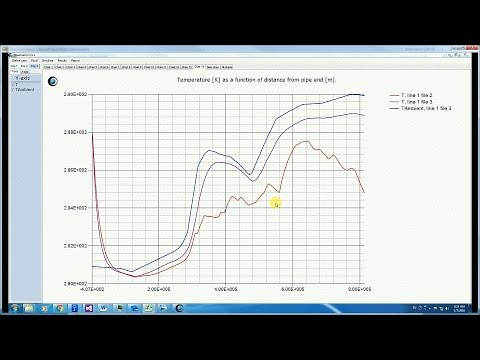

In [2]:
#@title Introduction to hydraulic simulation of pipelines
#@markdown This video gives an intriduction gas flo simulation in pipelines.
from IPython.display import YouTubeVideo
YouTubeVideo('C4mq8QlOOsQ', width=600, height=400)

#Steady state simulation of one phase pipe flow
In the follwoing code we simulate steady state flow of a gas or oil in a pipeline.

##Solving adiabatic flow in a gas pipeline

In [5]:
# Start by creating a fluid in neqsim
fluid1 = fluid("srk")  # create a fluid using the SRK-Eo
fluid1.addComponent("methane", 95.0)
fluid1.addComponent("ethane", 5.0)
fluid1.setMixingRule('classic')
fluid1.setTemperature(88.15, "C")
fluid1.setPressure(200.0, "bara")
fluid1.setTotalFlowRate(50.0, "MSm3/day")

stream1 = stream(fluid1)

deltaElevation = 0.0
pipeLength = 500000.0
roughness= 15.0e-6
diameter = 1.0
clearProcess()
pipeSimple = pipe(stream1, pipeLength, deltaElevation, diameter, roughness)
runProcess()
print('pressure out of pipeline ', pipeSimple.getOutStream().getFluid().getPressure('bara'), '[bara]')
printFrame(pipeSimple.getOutStream().getFluid())


pressure out of pipeline  140.22013378829195 [bara]
| 0                  | 1          | 2                  | 3   | 4   | 5   | 6               |
|:-------------------|:-----------|:-------------------|:----|:----|:----|:----------------|
|                    | total      | gas                |     |     |     |                 |
| methane            | 9.5E-1     | 9.5E-1             |     |     |     | [mole fraction] |
| ethane             | 5E-2       | 5E-2               |     |     |     | [mole fraction] |
|                    |            |                    |     |     |     |                 |
| Density            |            | 8.34502E1          |     |     |     | [kg/m^3]        |
| PhaseFraction      |            | 1E0                |     |     |     | [mole fraction] |
| MolarMass          | 1.67443E1  | 1.67443E1          |     |     |     | [kg/kmol]       |
| Z factor           |            | 9.40239E-1         |     |     |     | [-]             |
| Heat Capacity (C

##General solver for flow in a gas pipeline

pressure out of pipeline  161.93094080967592 [bara]
| 0                  | 1          | 2                  | 3   | 4   | 5   | 6               |
|:-------------------|:-----------|:-------------------|:----|:----|:----|:----------------|
|                    | total      | gas                |     |     |     |                 |
| methane            | 9.44605E-1 | 9.44605E-1         |     |     |     | [mole fraction] |
| ethane             | 5.53946E-2 | 5.53946E-2         |     |     |     | [mole fraction] |
|                    |            |                    |     |     |     |                 |
| Density            |            | 1.57212E2          |     |     |     | [kg/m^3]        |
| PhaseFraction      |            | 1E0                |     |     |     | [mole fraction] |
| MolarMass          | 1.682E1    | 1.682E1            |     |     |     | [kg/kmol]       |
| Z factor           |            | 7.57318E-1         |     |     |     | [-]             |
| Heat Capacity (C

Text(0, 0.5, 'Temperature [C]')

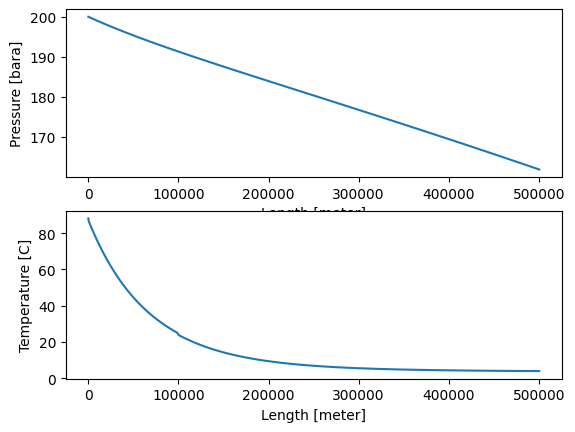

In [6]:


# Start by creating a fluid in neqsim
fluid1 = fluid("srk")  # create a fluid using the SRK-Eo
fluid1.addComponent("methane", 85.0)
fluid1.addComponent("ethane", 5.0)
fluid1.setMixingRule('classic')
fluid1.setTemperature(88.15, "C")
fluid1.setPressure(200.0, "bara")
fluid1.setTotalFlowRate(50.0, "MSm3/day")

diameter = [1.0, 1.0, 1.0]
roughness = [15.0e-6, 15.0e-6, 15.0e-6]
position = [0.0, 100000.0, 500000.0]
elevation = [0.0, 0.0, 0.0]
outtemperatures =[278.15, 278.15, 278.15]
outHeatU = [15.0, 15.0, 15.0]
wallHeatU = [15.0, 15.0, 15.0]

clearProcess()
stream1 = stream(fluid1)
pipe1 = pipeline(stream1, position, diameter, elevation, outtemperatures, roughness, outHeatU,wallHeatU)
runProcess()

print('pressure out of pipeline ', pipe1.getOutStream().getFluid().getPressure('bara'), '[bara]')
printFrame(pipe1.getOutStream().getFluid())

length = []
pressure = []
temperature = []
lengthtot = 0.0
for i in range(pipe1.getPipe().getTotalNumberOfNodes()):
  length.append(lengthtot);
  lengthtot = lengthtot+pipe1.getPipe().getNode(i).getLengthOfNode()
  pressure.append(pipe1.getPipe().getNode(i).getBulkSystem().getPressure('bara'))
  temperature.append(pipe1.getPipe().getNode(i).getBulkSystem().getTemperature('C'))

plt.figure()
plt.subplot(2, 1, 1)
plt.plot(length, pressure)
plt.xlabel('Length [meter]')
plt.ylabel('Pressure [bara]')
plt.subplot(2, 1, 2)
plt.plot(length, temperature)
plt.xlabel('Length [meter]')
plt.ylabel('Temperature [C]')